In [1]:
import pandas as pd
combats = pd.read_csv('E:\Sem6\Machine Learning\Project\combats.csv')
combats.head(3)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668


In [2]:
pokemon = pd.read_csv('E:\Sem6\Machine Learning\Project\pokemon.csv')
pokemon_266_298 = pokemon[pokemon['#'].isin([266, 298])]
pokemon_266_298

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
289,266,Silcoon,Bug,NaN,205,50,35,55,25,25,15,3,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


In [3]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head(3)

,First_pokemon,Second_pokemon,Winner
0,Silcoon,Azurill,Azurill
1,Dedenne,Hawlucha,Hawlucha
2,Sunkern,Pyroar,Pyroar


count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


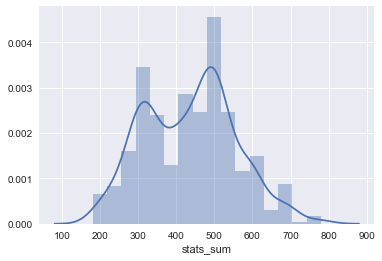

In [4]:
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

count    50000.00000
mean       169.99268
std        129.60332
min          0.00000
25%         65.00000
50%        145.00000
75%        250.00000
max        618.00000
dtype: float64


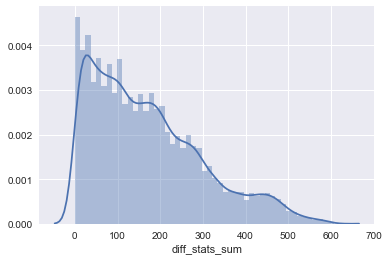

In [5]:
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

count    50000.000000
mean         1.310560
std        213.760127
min       -602.000000
25%       -145.000000
50%          1.000000
75%        146.000000
max        618.000000
dtype: float64


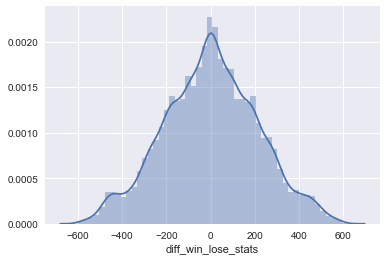

In [6]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.xlabel("diff_win_lose_stats")
plt.show()

In [7]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = diff_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
print ("Surpassing one's superiors Battle number : " + str(len(surpassing_stats_sum)))
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name.join(combats_stats_sum["diff"]).head(8)

Surpassing one's superiors Battle number : 15495


,First_pokemon,Second_pokemon,Winner,diff
5,Frogadier,752,Frogadier,-347
12,Pangoro,Surskit,Surskit,-226
14,Dustox,Noivern,Dustox,-150
15,763,LucarioMega Lucario,LucarioMega Lucario,-138
16,Haxorus,Whismur,Whismur,-300
17,Greninja,Magby,Magby,-165
18,Pignite,774,Pignite,-356
21,DiancieMega Diancie,Vivillon,Vivillon,-289


In [8]:
surpassing_name.join(combats_stats_sum["diff"]).sort_values(by="diff").head(4)

,First_pokemon,Second_pokemon,Winner,diff
33517,800,Ralts,Ralts,-602
14982,799,Ralts,Ralts,-601
40500,Azurill,790,Azurill,-600
4089,Scatterbug,799,Scatterbug,-599


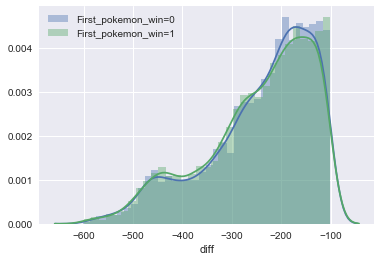

In [9]:
combats_stats_sum["First_Win"] =  combats_stats_sum.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==0]["diff"], label="First_pokemon_win=0")
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win=1")
plt.legend()
plt.show()

-First_Win=0-
count    26197.000000
mean         2.003054
std        214.018335
min       -602.000000
25%       -145.000000
50%          4.000000
75%        149.000000
max        618.000000
Name: diff, dtype: float64
-First_Win=1-
count    23803.000000
mean         0.548418
std        213.477488
min       -600.000000
25%       -143.000000
50%          0.000000
75%        145.000000
max        602.000000
Name: diff, dtype: float64


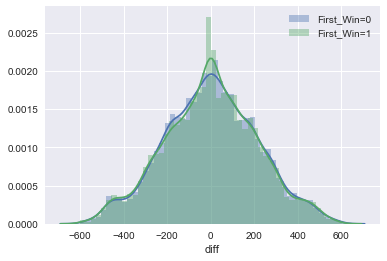

In [10]:
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"], label="First_Win=0")
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"], label="First_Win=1")
print ("-First_Win=0-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"].describe())
print ("-First_Win=1-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"].describe())
plt.legend()
plt.show()

In [11]:
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
list(pokemon["Type 1"].drop_duplicates())

There are 18 Types.


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [12]:
type_cols = ["Type 1", "Type 2"]
print ("There are {} unique type-combinations.".format(len(pokemon[type_cols].drop_duplicates())))

There are 154 unique type-combinations.


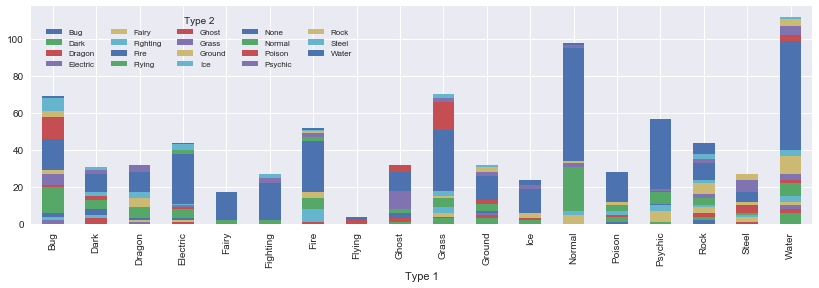

In [13]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()


In [16]:
first_num = combats_names["First_pokemon"].value_counts()
second_num = combats_names["Second_pokemon"].value_counts()
battle_num = first_num + second_num
battle_win = pd.DataFrame({"battle": battle_num, "win": combats_names["Winner"].value_counts()}, columns=["battle", "win"])
battle_win["ratio"] = battle_win["win"]/battle_win["battle"]
battle_win.sort_values(by=["ratio"], ascending=False).head(10)

NameError: name 'combats_names' is not defined

In [17]:
Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 0.5}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Diffender, Column is Attacker")
df_type_relation

Row is Diffender, Column is Attacker


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0
Fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
Fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0
Grass,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [20]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

combats_names = combats[cols].replace(names_dict)
print (combats_names["Winner"].value_counts()[:10])
winners = list(combats_names["Winner"])
winners_str = [str(i) for i in winners]
winners_text = (",").join(winners_str)
wc = WordCloud(background_color= "black", random_state=1, margin=3).generate(winners_text)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [21]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

ModuleNotFoundError: No module named 'wordcloud'

In [22]:
battle_win.info()

NameError: name 'battle_win' is not defined

In [23]:
import numpy as np

In [24]:
combats_names = combats[cols].replace(names_dict)
print (combats_names["Winner"].value_counts()[:10])
winners = list(combats_names["Winner"])
winners_str = [str(i) for i in winners]
winners_text = (",").join(winners_str)

Hoothoot                   152
Bonsly                     136
Meganium                   136
LopunnyMega Lopunny        134
Purugly                    133
Illumise                   133
HeracrossMega Heracross    130
Prinplup                   130
Lugia                      128
Buneary                    127
Name: Winner, dtype: int64


In [25]:
first_num = combats_names["First_pokemon"].value_counts()
second_num = combats_names["Second_pokemon"].value_counts()
battle_num = first_num + second_num
battle_win = pd.DataFrame({"battle": battle_num, "win": combats_names["Winner"].value_counts()}, columns=["battle", "win"])
battle_win["ratio"] = battle_win["win"]/battle_win["battle"]
battle_win.sort_values(by=["ratio"], ascending=False).head(10)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:4861: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


,battle,win,ratio
Cyndaquil,129,127.0,0.984496
Pansear,119,116.0,0.974790
Goomy,125,121.0,0.968000
Raticate,119,115.0,0.966387
Meganium,141,136.0,0.964539
Dusknoir,129,124.0,0.961240
727,127,122.0,0.960630
Yveltal,123,118.0,0.959350
Ledyba,125,119.0,0.952000
Milotic,120,114.0,0.950000


In [26]:
battle_win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, Claydol to Staraptor
Data columns (total 3 columns):
battle    784 non-null int64
win       783 non-null float64
ratio     783 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.5+ KB


In [27]:
battle_win[battle_win["win"].isnull()]

,battle,win,ratio
Phanpy,135,NaN,NaN


In [28]:
battle_win.loc["Shuckle", ["win", "ratio"]] = 0
battle_win[battle_win.index=="Shuckle"]

,battle,win,ratio
Shuckle,127,0.0,0.0


In [29]:
id_dict = dict(zip(pokemon['Name'], pokemon['#']))
battle_win["Name"] = battle_win.index
battle_win["#"] = battle_win["Name"].replace(id_dict)
ratio_dict = dict(zip(battle_win['#'], battle_win['ratio']))
pokemon["ratio"] = pokemon["#"].replace(ratio_dict)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,Type,ratio
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318,Grass/Poison,0.278195
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405,Grass/Poison,0.380165
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525,Grass/Poison,0.674242
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625,Grass/Poison,0.674242
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,309,Fire/None,0.560000


In [30]:
nobattle_pokemon = pokemon[pokemon["ratio"]>1]
print ("There are {} pokemons have NaN ratio.".format(len(nobattle_pokemon.index)))
nobattle_pokemon[["#", "Name", "ratio"]]

There are 20 pokemons have NaN ratio.


,#,Name,ratio
15,12,Butterfree,12.0
38,33,Nidorino,33.0
51,46,Paras,46.0
72,66,Machop,66.0
84,78,Rapidash,78.0
97,90,Shellder,90.0
156,144,Articuno,144.0
198,183,Marill,183.0
255,236,Tyrogue,236.0
352,322,Numel,322.0


In [32]:
pokemon.loc[62, "Name"] = "Primeape"
pokemon[pokemon["Name"]=="Primeape"][["#", "Name", "ratio"]]

,#,Name,ratio
62,57,Primeape,0.84375


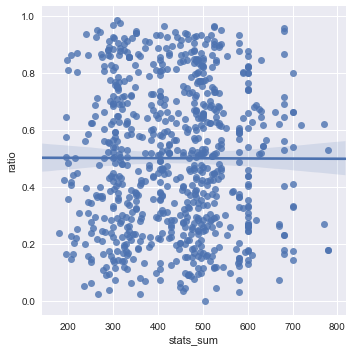

In [33]:
battle_pokemon = pokemon[pokemon["ratio"] <= 1]
sns.lmplot(x="stats_sum", y="ratio", data=battle_pokemon)

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(battle_pokemon["stats_sum"].values.reshape(-1, 1), battle_pokemon["ratio"].values.reshape(-1, 1))
nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))
nobattle_pokemon[["#", "Name", "ratio"]]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,#,Name,ratio
15,12,Butterfree,0.500789
38,33,Nidorino,0.500947
51,46,Paras,0.501369
72,66,Machop,0.501263
84,78,Rapidash,0.500237
97,90,Shellder,0.501263
156,144,Articuno,0.499815
198,183,Marill,0.501553
255,236,Tyrogue,0.501763
352,322,Numel,0.501263


In [35]:
combats_add_data = combats.copy()
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))
combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)
combats_add_data["First_pokemon_hp"] = combats_add_data["First_pokemon"].replace(hp_dict)
combats_add_data["First_pokemon_attack"] = combats_add_data["First_pokemon"].replace(attack_dict)
combats_add_data["First_pokemon_defense"] = combats_add_data["First_pokemon"].replace(defense_dict)
combats_add_data["First_pokemon_spattack"] = combats_add_data["First_pokemon"].replace(spattack_dict)
combats_add_data["First_pokemon_spdefense"] = combats_add_data["First_pokemon"].replace(spdefense_dict)
combats_add_data["First_pokemon_speed"] = combats_add_data["First_pokemon"].replace(speed_dict)
combats_add_data["First_pokemon_stats"] = combats_add_data["First_pokemon"].replace(stats_sum_dict)
combats_add_data["First_pokemon_ratio"] = combats_add_data["First_pokemon"].replace(ratio_dict)
combats_add_data["Second_pokemon_type"] = combats_add_data["Second_pokemon"].replace(type_dict)
combats_add_data["Second_pokemon_hp"] = combats_add_data["Second_pokemon"].replace(hp_dict)
combats_add_data["Second_pokemon_attack"] = combats_add_data["Second_pokemon"].replace(attack_dict)
combats_add_data["Second_pokemon_defense"] = combats_add_data["Second_pokemon"].replace(defense_dict)
combats_add_data["Second_pokemon_spattack"] = combats_add_data["Second_pokemon"].replace(spattack_dict)
combats_add_data["Second_pokemon_spdefense"] = combats_add_data["Second_pokemon"].replace(spdefense_dict)
combats_add_data["Second_pokemon_speed"] = combats_add_data["Second_pokemon"].replace(speed_dict)
combats_add_data["Second_pokemon_stats"] = combats_add_data["Second_pokemon"].replace(stats_sum_dict)
combats_add_data["Second_pokemon_ratio"] = combats_add_data["Second_pokemon"].replace(ratio_dict)


def calcTypeRelation(combats_add_data):
    r0 = 1
    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r = r0 * r1 * r3
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r = r0 * r1 * r2
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r = r0 * r1
    return r

combats_add_data["Relation"] = combats_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
combats_add_data["First_win"] = combats_add_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)
noneed_cols = ["First_pokemon", "Second_pokemon", "Winner", "First_pokemon_type", "Second_pokemon_type"]
combats_add_data = combats_add_data.drop(noneed_cols, axis=1)
combats_add_data.head()

AttributeError: ("'int' object has no attribute 'split'", 'occurred at index 5')

In [36]:
from sklearn.model_selection import train_test_split

X = combats_add_data.drop("First_win", axis=1)
y = combats_add_data["First_win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
print("X_train.shape = " + str(X_train.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

ValueError: labels ['First_win'] not contained in axis

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_test, y_test)*100, 2)
acc_log

NameError: name 'X_train' is not defined

In [38]:
combats_add_data = combats.copy()

In [39]:
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)

In [40]:
combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)

In [41]:
combats_add_data["First_pokemon_hp"] = combats_add_data["First_pokemon"].replace(hp_dict)
combats_add_data["First_pokemon_attack"] = combats_add_data["First_pokemon"].replace(attack_dict)
combats_add_data["First_pokemon_defense"] = combats_add_data["First_pokemon"].replace(defense_dict)
combats_add_data["First_pokemon_spattack"] = combats_add_data["First_pokemon"].replace(spattack_dict)
combats_add_data["First_pokemon_spdefense"] = combats_add_data["First_pokemon"].replace(spdefense_dict)
combats_add_data["First_pokemon_speed"] = combats_add_data["First_pokemon"].replace(speed_dict)
combats_add_data["First_pokemon_stats"] = combats_add_data["First_pokemon"].replace(stats_sum_dict)
combats_add_data["First_pokemon_ratio"] = combats_add_data["First_pokemon"].replace(ratio_dict)
combats_add_data["Second_pokemon_type"] = combats_add_data["Second_pokemon"].replace(type_dict)
combats_add_data["Second_pokemon_hp"] = combats_add_data["Second_pokemon"].replace(hp_dict)
combats_add_data["Second_pokemon_attack"] = combats_add_data["Second_pokemon"].replace(attack_dict)
combats_add_data["Second_pokemon_defense"] = combats_add_data["Second_pokemon"].replace(defense_dict)
combats_add_data["Second_pokemon_spattack"] = combats_add_data["Second_pokemon"].replace(spattack_dict)
combats_add_data["Second_pokemon_spdefense"] = combats_add_data["Second_pokemon"].replace(spdefense_dict)

In [42]:
combats_add_data["Second_pokemon_speed"] = combats_add_data["Second_pokemon"].replace(speed_dict)
combats_add_data["Second_pokemon_stats"] = combats_add_data["Second_pokemon"].replace(stats_sum_dict)
combats_add_data["Second_pokemon_ratio"] = combats_add_data["Second_pokemon"].replace(ratio_dict)

In [43]:
def calcTypeRelation(combats_add_data):
    r0 = 1
    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r = r0 * r1 * r3
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r = r0 * r1 * r2
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r = r0 * r1
    return r

In [45]:
combats_add_data.head()

,First_pokemon,Second_pokemon,Winner,First_pokemon_type,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,...,First_pokemon_ratio,Second_pokemon_type,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio
0,266,298,298,Bug/None,50,35,55,25,25,15,...,0.227273,Normal/Fairy,50,20,40,20,40,20,190,0.424779
1,702,701,701,Electric/Fairy,67,58,57,81,67,101,...,0.896000,Fighting/Flying,78,92,75,74,63,118,500,0.853659
2,191,668,668,Grass/None,30,30,30,30,30,30,...,0.236220,Fire/Normal,86,68,72,109,66,106,507,0.156716
3,237,683,683,Fighting/None,50,95,95,35,110,70,...,0.032520,Fairy/None,101,72,72,99,89,29,462,0.278571
4,151,231,151,Psychic/None,100,100,100,100,100,100,...,0.355072,Ground/None,90,60,60,40,40,40,330,NaN


In [50]:
pokemon.sort_values("Speed",ascending=False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,Type,ratio
431,386,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,True,600,Psychic/None,0.264706
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,456,Bug/Flying,0.521739
428,386,DeoxysNormal Forme,Psychic,None,600,50,150,50,150,50,150,3,True,600,Psychic/None,0.264706
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,615,Rock/Flying,0.678832
71,65,AlakazamMega Alakazam,Psychic,None,590,55,50,65,175,95,150,1,False,590,Psychic/None,0.798246
429,386,DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True,600,Psychic/None,0.264706
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,495,Bug/Poison,0.097744
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,630,Grass/Dragon,0.666667
678,617,Accelgor,Bug,None,495,80,70,40,100,60,145,5,False,495,Bug/None,0.352459
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True,780,Psychic/None,0.179688
